<a href="https://colab.research.google.com/github/prakash-bisht/Deep_Learning/blob/main/optimization_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils_v1a import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils_v1a import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1 Gradient Descent

In [ ]:
# A simple optimization method in machine learning is gradient descent (GD). 
# When you take gradient steps with respect to all  examples on each step, 
# it is also called Batch Gradient Descent.

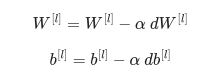

In [ ]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    layers = len(parameters) // 2
    for i in range(1,layers):
      parameters["W"+str(i)] = parameters["W"+str(i)] - learning_rate * grads["dW"+str(i)]
      parameters["b"+str(i)] = parameters["b"+str(i)] - learning_rate * grads["db"+str(i)]
    return parameters 


In [ ]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()
parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 =\n" + str(parameters["W1"]))
print("b1 =\n" + str(parameters["b1"]))
print("W2 =\n" + str(parameters["W2"]))
print("b2 =\n" + str(parameters["b2"]))

W1 =
[[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 =
[[ 1.74604067]
 [-0.75184921]]
W2 =
[[ 0.3190391  -0.24937038  1.46210794]
 [-2.06014071 -0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127 -0.17242821]]
b2 =
[[-0.87785842]
 [ 0.04221375]
 [ 0.58281521]]


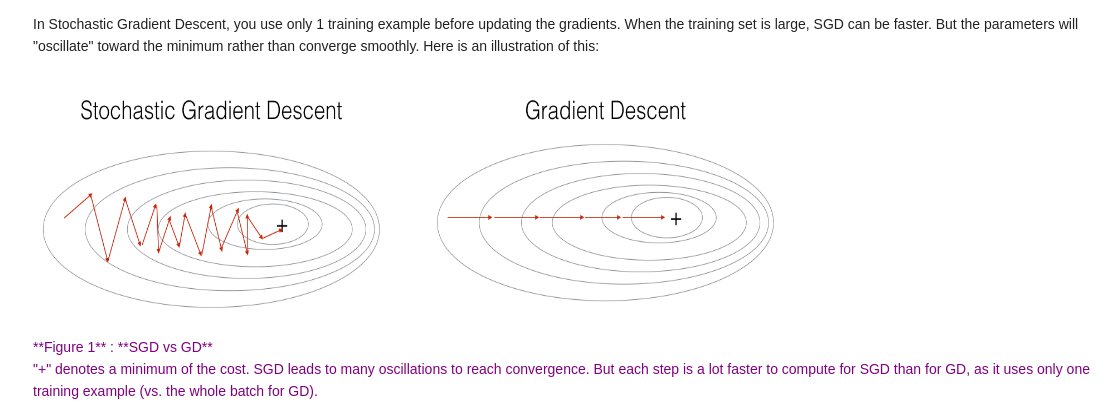

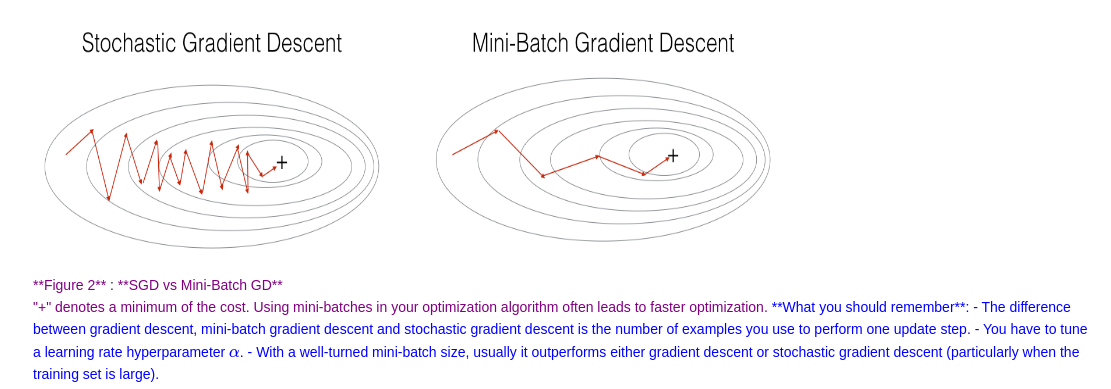

2 - Mini-Batch Gradient descent

In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    np.random.seed(seed)
    mini_batches = []
    m = X.shape[1]
    permutation = list(np.random.permutation(m))
    shuffled_x = X[:,permutation]
    shuffled_y = Y[:,permutation].reshape((1,m))
    mini_batch_iteration = math.floor(m/mini_batch_size)
    for i in range(mini_batch_iteration):
      mini_batch_x = shuffled_x[:,i*mini_batch_size : (i+1)* mini_batch_size]
      mini_batch_y = shuffled_y[:,i*mini_batch_size : (i+1) * mini_batch_size]
      mini_batch = (mini_batch_x,mini_batch_y)
      mini_batches.append(mini_batch)

    if m % mini_batch_size != 0:
      mini_batch_x = shuffled_x[:,int(m/mini_batch_size)*mini_batch_size:]
      mini_batch_y = shuffled_y[:,int(m/mini_batch_size)*mini_batch_size:]
      mini_batch = (mini_batch_x,mini_batch_y)
      mini_batches.append(mini_batch)

    return mini_batches

In [ ]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


3 - Momentum

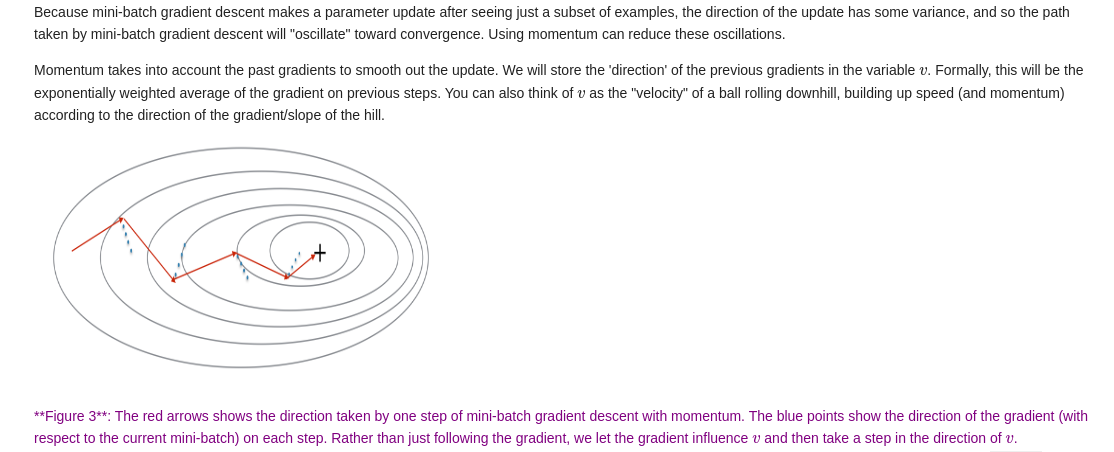

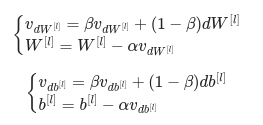

In [ ]:
def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """

    v = {}
    layers = len(parameters) // 2
    for i in range(layers):
      v['dW'+str(i+1)] = np.zeros((parameters['W'+str(i+1)].shape[0],parameters['W'+str(i+1)].shape[1]))
      v['db'+str(i+1)] = np.zeros((parameters['b'+str(i+1)].shape[0],parameters['b'+str(i+1)].shape[1]))
    return v 


In [ ]:
parameters = initialize_velocity_test_case()
v = initialize_velocity(parameters)
print("v[\"dW1\"] =\n" + str(v["dW1"]))
print("v[\"db1\"] =\n" + str(v["db1"]))
print("v[\"dW2\"] =\n" + str(v["dW2"]))
print("v[\"db2\"] =\n" + str(v["db2"]))

v["dW1"] =
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] =
[[0.]
 [0.]]
v["dW2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] =
[[0.]
 [0.]
 [0.]]


In [ ]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    layers = len(parameters) // 2
    for i in range(layers):
      v["dW"+str(i+1)] = beta * v["dW"+str(i+1)] + (1 - beta) * grads["dW"+str(i+1)]
      v["db"+str(i+1)] = beta * v["db"+str(i+1)] + (1 - beta) * grads["db"+str(i+1)]

      parameters["W"+str(i+1)] = parameters["W"+str(i+1)]  - learning_rate * v['dW'+str(i+1)]
      parameters["b"+str(i+1)] = parameters["b"+str(i+1)]  - learning_rate * v['db'+str(i+1)]  

    return parameters,v     

In [ ]:
parameters, grads, v = update_parameters_with_momentum_test_case()
parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = v" + str(v["db2"]))

W1 = 
[[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = 
[[ 1.74493465]
 [-0.76027113]]
W2 = 
[[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = 
[[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = v[[0.02344157]
 [0.16598022]
 [0.07420442]]


In [ ]:
# Momentum takes past gradients into account to smooth out the steps of gradient descent. 
# It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent. 
# You have to tune a momentum hyperparameter  and a learning rate .

4 - Adam

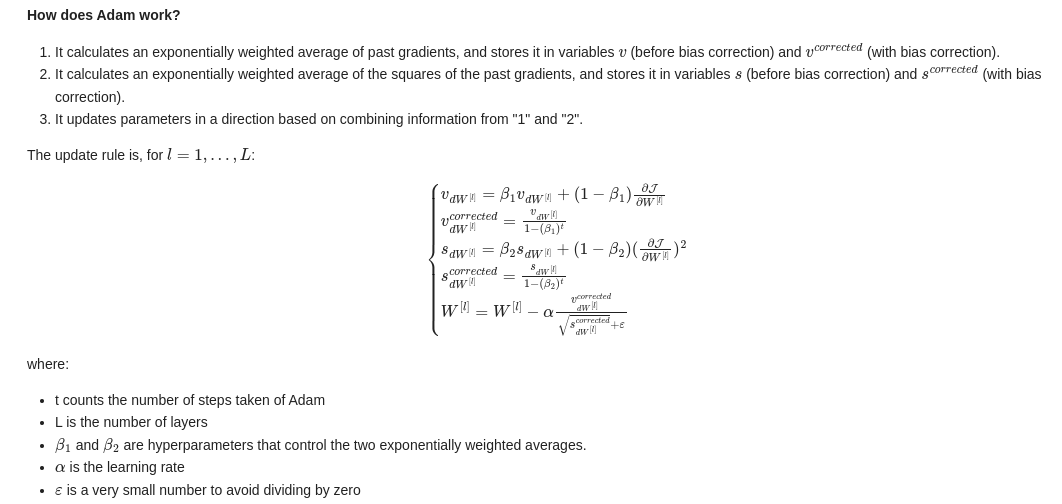

In [ ]:
def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    layers = len(parameters) // 2
    v = {}
    s = {}
    for i in range(layers):
      v['dW'+str(i+1)] = np.zeros((parameters['W'+str(i+1)].shape[0],parameters['W'+str(i+1)].shape[1]))
      v['db'+str(i+1)] = np.zeros((parameters['b'+str(i+1)].shape[0],parameters['b'+str(i+1)].shape[1]))
      s['dW'+str(i+1)] = np.zeros((parameters['W'+str(i+1)].shape[0],parameters['W'+str(i+1)].shape[1]))
      s['db'+str(i+1)] = np.zeros((parameters['b'+str(i+1)].shape[0],parameters['b'+str(i+1)].shape[1]))
    return v,s


In [ ]:
parameters = initialize_adam_test_case()
v, s = initialize_adam(parameters)
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

v["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = 
[[0.]
 [0.]]
v["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = 
[[0.]
 [0.]
 [0.]]
s["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = 
[[0.]
 [0.]]
s["dW2"] = 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = 
[[0.]
 [0.]
 [0.]]


In [ ]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """

    layers = len(parameters) // 2
    v_corrected = {}
    s_corrected = {}

    for i in range(layers):
      v["dW"+str(i+1)] = beta1 * v["dW"+str(i+1)] + (1 - beta1) * grads["dW"+str(i+1)]
      v["db"+str(i+1)] = beta1 * v["db"+str(i+1)] + (1 - beta1) * grads["db"+str(i+1)]

      v_corrected['W'+str(i)] =  v["dW"+str(i+1)] / (1 - beta1**t)
      v_corrected['b'+str(i)] =  v["db"+str(i+1)] / (1 - beta1**t)

      s["dW"+str(i+1)] = beta2 * s["dW"+str(i+1)] + (1 - beta2) * np.square(grads["dW"+str(i+1)])
      s["db"+str(i+1)] = beta2 * s["db"+str(i+1)] + (1 - beta2) * np.square(grads["db"+str(i+1)])

      s_corrected['W'+str(i)] =  s["dW"+str(i+1)] / (1 - beta2**t)
      s_corrected['b'+str(i)] =  s["db"+str(i+1)] / (1 - beta2**t)

      parameters["W"+str(i+1)] = parameters["W"+str(i+1)]  - learning_rate * v_corrected['W'+str(i)] / np.sqrt(s_corrected['W'+str(i)] + epsilon)
      parameters["b"+str(i+1)] = parameters["b"+str(i+1)]  - learning_rate * v_corrected['b'+str(i)] / np.sqrt(s_corrected['b'+str(i)] + epsilon)

    return parameters,v,s

In [ ]:
parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("v[\"dW1\"] = \n" + str(v["dW1"]))
print("v[\"db1\"] = \n" + str(v["db1"]))
print("v[\"dW2\"] = \n" + str(v["dW2"]))
print("v[\"db2\"] = \n" + str(v["db2"]))
print("s[\"dW1\"] = \n" + str(s["dW1"]))
print("s[\"db1\"] = \n" + str(s["db1"]))
print("s[\"dW2\"] = \n" + str(s["dW2"]))
print("s[\"db2\"] = \n" + str(s["db2"]))

W1 = 
[[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = 
[[ 1.75225313]
 [-0.75376553]]
W2 = 
[[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = 
[[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = 
[[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = 
[[-0.01228902]
 [-0.09357694]]
v["dW2"] = 
[[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = 
[[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = 
[[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = 
[[1.51020075e-05]
 [8.75664434e-04]]
s["dW2"] = 
[[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db2"] = 
[[5.49507194e-05]
 [2.75494327e-03]
 [5.50629536e-04]]
